# Calibration of a Neutron Probe

A neutron probe uses neutron scattering to estimate the soil water content. Neutron scattering is a well-estbalished technique and often represents the gold-standard after the  thermo-gravimetric method. 

A device consisting of a probe encapsulating Americum-241 and Beryllium is lowered into the soil profile through a previously installed access tube. An active neutron counter monitors the number of epithermal (fast-moving) neutrons that bounce back to the probe. The ratio between the emitted epithermal and the returned epithermal neutrons is an indications of the amout of hydrogen in the soil, and thus a strong indicator of water content. 

The collision between neutrons and Hydrogen atoms results in a high loss of kinetic energy since they roughly have the same size, meaning that in environments with high amount of Hydrogen, neutrons become thermalized (they are slowed down) with fewer collisions than when the soil dry. Neutrons also breach a thermalized state by collisions with Carbon and Oxygen atoms that are abundant in the soil, but because of the substantially large difference in size between C and O compared to a single neutron, it takes many more collisions. Thus, the method is fairly insensitive to other atoms. However, the effect is noticeable and soil-specific calibrations are required to account for this additional effect.

Measurements for a given depth usually take about 15-20 seconds and the cable probe has stoppers that allow the user to monitor virtually any soil depth. Usually a depth-control stand is used to ensure accurate soil depths.

**Advantages of the method**

- Portable. It can be used in multiple access tubes within a single day. Ideal for plot experiments.
- Non-invasive. Measurements occur in undisturbed soil. The access tube is usually installed using a hydraulic probe, which means that the disturbance on the soil is minimal.
- Fairly large sensing volume relative to common soil moisture sensors based on electromagnetic principles.
- Accurate. With a sutom calibration, the RMSE can be lowered down to about 1% cm$^3$/cm$^3$


**Disadvantages of the method**

- Requires periodic trainings to handle and transport radioactive materials.
- Instrument can result heavy if the user has to measure multiple plots.
- Cannot be deployed for automated soil moisture tracking (or at least it's not recommended)
- Requires soil-specific calibration. The method is ideal for long-term experiments. Not so ideal for field experiments that change every growing season.
- Requires the installation of access tubes. An entire day is usually allocated for this process before any readings can be taken.
- Access tubes can become an obstacle during farming operations.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../datasets/active_neutron_counts.csv")
df.head()


,calibration,core,top_depth,bottom_depth,vwc,count_ratio
0,Dry,1,30,60,0.279,1.63
1,Dry,1,60,90,0.259,1.54
2,Dry,1,90,120,0.265,1.46
3,Dry,1,120,150,0.252,1.52
4,Dry,2,30,60,0.278,1.63


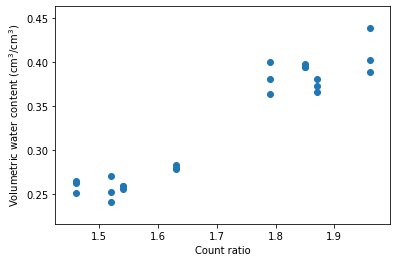

In [13]:
plt.figure()
plt.scatter(df["count_ratio"], df["vwc"])
plt.xlabel("Count ratio")
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)")
plt.show()


In [34]:
# Fit linear model
par = np.polyfit(df["count_ratio"],df["vwc"], 1)
model = np.poly1d(par)
print(model)


 
0.3557 x - 0.2793


In [35]:
vwc_pred = np.arange(1.2, 2.2)
count_ratio_pred = model(vwc_pred)


In [58]:
# Compute root mean squared error (RMSE)
RMSE = np.sqrt(np.nanmean((model(df["count_ratio"]) - df["vwc"])**2))
print(round(RMSE,3), "cm^3/cm^3")


0.019 cm^3/cm^3


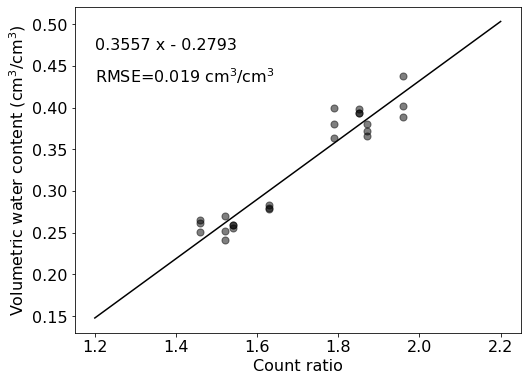

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(df["count_ratio"], df["vwc"], s=50, facecolor='k', alpha=0.5, edgecolor='k')
plt.plot(vwc_pred, count_ratio_pred, '-k')
plt.xlabel("Count ratio", size=16)
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)", size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.annotate(str(model), (1.2,0.47), size=16)
plt.annotate("RMSE="+ str(round(RMSE,3)) +" cm$^3$/cm$^3$", (1.2,0.43), size=16)
plt.show()


## References

Evett, S.R., Tolk, J.A. and Howell, T.A., 2003. A depth control stand for improved accuracy with the neutron probe. Vadose Zone Journal, 2(4), pp.642-649.

Patrignani, A., Godsey, C.B., Ochsner, T.E. and Edwards, J.T., 2012. Soil water dynamics of conventional and no-till wheat in the Southern Great Plains. Soil Science Society of America Journal, 76(5), pp.1768-1775.

Patrignani, A., Godsey, C.B. and Ochsner, T.E., 2019. No-Till Diversified Cropping Systems for Efficient Allocation of Precipitation in the Southern Great Plains. Agrosystems, Geosciences & Environment, 2(1).